In [2]:
import pandas as pd
import matplotlib as plt
from fbprophet import Prophet
import numpy as np 


In [4]:
data = pd.read_csv('/content/amzn.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6.050000e+03
mean,470.433910,475.702096,464.543413,470.274623,470.274623,7.402335e+06
std,774.504411,782.756815,764.855010,773.821429,773.821429,7.187745e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.482501,39.197499,37.872499,38.520000,38.520000,3.640775e+06
50%,89.036251,90.990002,86.750000,89.071251,89.071251,5.556750e+06
75%,429.697494,432.875000,426.237503,429.617508,429.617508,8.363125e+06
max,3547.000000,3554.000000,3486.689941,3531.449951,3531.449951,1.043292e+08


In [15]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format= True)


In [20]:
data = data[['Date','Close']]

In [21]:
data.head()

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


In [24]:
data = data.rename( columns={"Date": "ds", "Close": 'y'})

In [25]:
data.head()

,ds,y
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


In [26]:
model = Prophet()

In [27]:
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
prediction = model.make_future_dataframe(periods=500)

In [30]:
forcast = model.predict(prediction)

In [31]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-05-15,-6.127483,-166.465781,159.381461,-6.127483,-6.127483,0.539001,0.539001,0.539001,-1.054298,-1.054298,-1.054298,1.593299,1.593299,1.593299,0.0,0.0,0.0,-5.588482
1,1997-05-16,-6.050816,-163.686456,151.304076,-6.050816,-6.050816,-2.378955,-2.378955,-2.378955,-3.284213,-3.284213,-3.284213,0.905258,0.905258,0.905258,0.0,0.0,0.0,-8.429771
2,1997-05-19,-5.820814,-176.831982,143.783430,-5.820814,-5.820814,-3.051319,-3.051319,-3.051319,-2.348956,-2.348956,-2.348956,-0.702364,-0.702364,-0.702364,0.0,0.0,0.0,-8.872133
3,1997-05-20,-5.744147,-169.137758,147.988834,-5.744147,-5.744147,-2.034560,-2.034560,-2.034560,-0.960297,-0.960297,-0.960297,-1.074263,-1.074263,-1.074263,0.0,0.0,0.0,-7.778707
4,1997-05-21,-5.667479,-163.750115,153.262044,-5.667479,-5.667479,-1.830232,-1.830232,-1.830232,-0.467153,-0.467153,-0.467153,-1.363079,-1.363079,-1.363079,0.0,0.0,0.0,-7.497711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,2023-08-02,4225.871964,4057.987401,4430.111832,4152.562650,4300.195848,20.326514,20.326514,20.326514,-0.467153,-0.467153,-0.467153,20.793667,20.793667,20.793667,0.0,0.0,0.0,4246.198479
6846,2023-08-03,4227.305461,4055.678527,4420.376975,4153.874081,4301.764120,18.985957,18.985957,18.985957,-1.054298,-1.054298,-1.054298,20.040255,20.040255,20.040255,0.0,0.0,0.0,4246.291419
6847,2023-08-04,4228.738958,4057.667684,4435.707517,4155.185511,4303.319010,16.082953,16.082953,16.082953,-3.284213,-3.284213,-3.284213,19.367166,19.367166,19.367166,0.0,0.0,0.0,4244.821911
6848,2023-08-05,4230.172455,4062.807975,4428.078458,4156.496942,4304.869904,22.844202,22.844202,22.844202,4.057458,4.057458,4.057458,18.786744,18.786744,18.786744,0.0,0.0,0.0,4253.016656


In [34]:
Forcast = forcast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

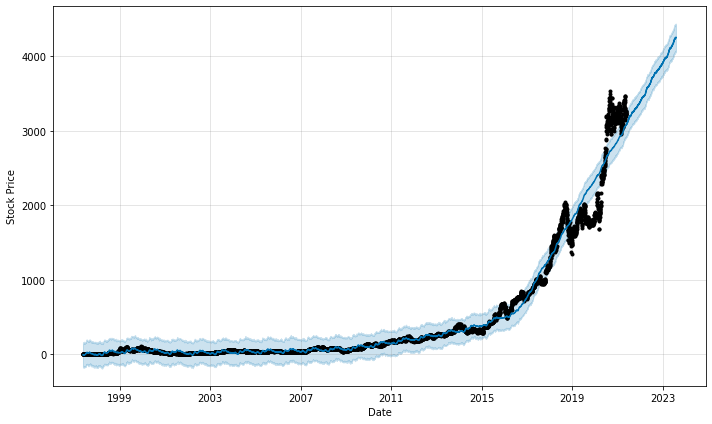

In [35]:
Graph = model.plot(Forcast , xlabel= "Date", ylabel='Stock Price',)
